# Data Question 1: An Exploration of UN data

##Guided Practice:

1. Download two CSV files and place them in the data folder of your local 
Data Question 1 repository: 
a. Gross Domestic Product (GDP) per capita: 
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY 
.GDP.PCAP.PP.KD 
• DO NOT APPLY ANY FILTERS 
• rename the file to gdp_per_capita.csv 
• open it with a text editor (not Excel) and take a look 

b. Percentage of Individuals using the Internet: 
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H 
• DO NOT APPLY ANY FILTERS 
• rename the file to internet_use.csv 
• open it with a text editor (not Excel) and take a look 

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

• You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it. 
• Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from ‘Code’ to ‘Markdown’. Here is a link to a cheat sheet showing the basics of styling text using Markdown.

In [103]:
### 3.Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

### 4. plots show in the notebook without having to call plt.show() every time

%matplotlib inline

In [2]:
###5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
## Take a look at the first 10 rows.
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
## Look at the last 5 rows. Do you see a problem?
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
## Redo the read_csv() call to correct this issue - do not modify the original csv file.
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [7]:
### 5. Drop the ‘Value Footnotes’ column (axis=1 for columns and axis=0 for rows)
gdp_df =gdp_df.drop(['Value Footnotes'], axis=1)
gdp_df.head(5)

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [8]:
## 6. and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.
gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}, inplace = True)
gdp_df.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [9]:
### 7. How many rows and columns does gdp_df have?
gdp_df.shape

(6729, 3)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
Country           6729 non-null object
Year              6729 non-null object
GDP_Per_Capita    6729 non-null float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [11]:
## What are the data types of its columns?
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [12]:
## If any of the columns are not the expected types, figure out why and fix it.
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'])

In [13]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [14]:
### 8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

Years goes from 1990 to 2018 and the number of observations per year are not the same and range from 210 to 243.

In [15]:
### 9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?
gdp_df['Country'].value_counts()

Sweden                                           29
East Asia & Pacific                              29
Botswana                                         29
Nepal                                            29
Malta                                            29
Trinidad and Tobago                              29
Bulgaria                                         29
Namibia                                          29
OECD members                                     29
IDA & IBRD total                                 29
Samoa                                            29
Bahrain                                          29
Pakistan                                         29
Puerto Rico                                      29
Latin America & Caribbean                        29
Dem. Rep. Congo                                  29
Tunisia                                          29
Papua New Guinea                                 29
Malaysia                                         29
Ecuador     

There is 243 different countries represented in this dataset and the least represented are Djibouti, South Sudan, Turks and caicos Islands and Sint Maaten. These 4 last are less represented which means several GDP per capita per years are missing from these countries. For example Djibouti gave only one and from question 8. I can say the year given was 2011.


In [16]:
### 10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [17]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [18]:
### 11. Use .describe() to find the summary statistics for GDP per capita in 2014.
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


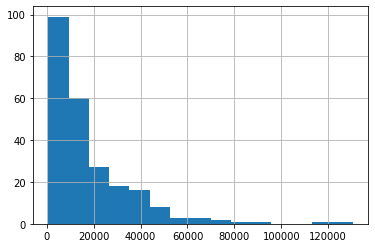

In [20]:
### 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?
gdp_2014.GDP_Per_Capita.hist(bins=15);

The distribution is skewed to the right. The majority of the data is found between 0 and 20,000. After 20,000 there is less and less values and there is some ouliers around 120,000.

In [21]:
###13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.
gdp_2014_up = gdp_2014.sort_values('GDP_Per_Capita', axis=0, ascending = False)
gdp_2014_up.head(5)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [22]:
gdp_2014_down = gdp_2014.sort_values('GDP_Per_Capita', axis=0, ascending = True)
gdp_2014_down.head(5)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [23]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) |
                    (gdp_df['Year'] == 2017)].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns= 'Year').dropna()

#gdp_pivoted = gdp_pivoted = gdp_df.pivot_table(columns=['Year'], index=['Country'], values='GDP_Per_Capita')[[1990, 2017]].dropna()

In [24]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [25]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [26]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [27]:
gdp_pivoted.loc[gdp_pivoted.Percent_Change < 0].sort_values('Percent_Change', ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Comoros,2580.500555,2555.966364,-0.950753
Kyrgyz Republic,3474.667969,3393.617990,-2.332596
Aruba,37140.024657,35861.828118,-3.441561
Guinea-Bissau,1633.612989,1576.748994,-3.480873
Congo,5323.022707,5103.142821,-4.130734
The Gambia,2448.493198,2240.327478,-8.501789
The Bahamas,31005.636485,28318.107428,-8.667873
Zimbabwe,2819.549467,2568.410072,-8.907075
Brunei,84693.336970,72523.729446,-14.369026


In [28]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape

(20, 3)

There is 20 countries with a negative percentage.

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country’s GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [29]:
gdp_pivoted.nlargest(1, 'Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464


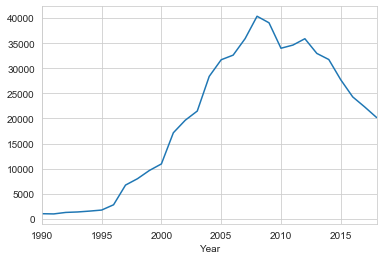

In [85]:
gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(['Equatorial Guinea'])]
fig, ax =plt.subplots()
gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax, legend=False);

It's equatorial Guinea.

In [30]:
gdp_pivoted_on_year = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Year', columns= 'Country')
gdp_pivoted_on_year.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,World,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,NaN,4458.247115,10300.015042,4761.229638,17454.549799,10491.507721,11372.823108,3742.431024,37140.024657,28669.059474,...,9841.947945,3851.572604,2550.348904,14619.454190,1457.594613,NaN,8966.014072,3425.707169,2339.137959,2819.549467
1991,NaN,3229.250120,9929.097717,4651.204299,17598.378401,10243.813560,12238.788847,3335.595238,38562.960618,28193.528651,...,10118.456960,3751.770475,2558.105707,15671.799905,1512.269780,NaN,8942.915645,3466.039074,2278.802025,2906.272849
1992,NaN,3015.391377,9873.024864,4238.318419,17497.380127,10573.827918,13032.793286,1976.525218,38669.374901,27968.401884,...,10842.062014,3254.375512,2549.081095,16248.555062,1609.492026,NaN,8959.240204,3561.740073,2185.120656,2591.007534
1993,NaN,3323.864388,9453.323181,3118.903488,18055.500956,10618.558714,13919.403900,1845.314220,39051.995974,28812.100376,...,11048.652061,3108.086275,2494.681477,15937.294015,1705.335543,NaN,8984.696890,3519.550101,2278.347123,2572.870395
1994,NaN,3622.007101,9176.235569,3060.336207,18851.937822,10657.260745,14546.538787,1992.015239,39944.111433,29644.146020,...,11766.475121,2889.187663,2647.923540,15231.183400,1822.025810,3236.196368,9109.764275,3581.814359,2031.776457,2768.309953


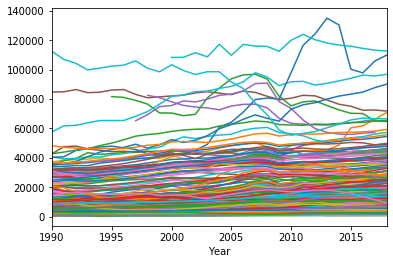

In [31]:
gdp_pivoted_on_year.plot(kind = 'line', legend=False);
#plt.show()

In [32]:
gdp_pivoted.nlargest(2, 'Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


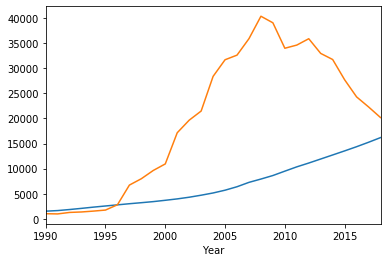

In [33]:
#Bonus: Put both line charts on the same plot.
gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])]
fig, ax =plt.subplots()
gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax, legend=False);

Equatorial guinea's GDP per capita is increasing very fast until 2006-2007 then crash however China is increasing slower but steadier.

18. Read in continents.csv contained in the data folder into a new dataframe
called continents. We will be using this dataframe to add a new column
to our dataset.

In [35]:
continents = pd.read_csv('../data/continents.csv')

In [36]:
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


In [37]:
continents.shape

(216, 2)

19. Merge gdp_df and continents. Keep only the countries that appear in
both data frames. Save the result back to gdp_df.

In [38]:
gdp_df = gdp_df.merge(continents, on= 'Country', how ='left')

In [39]:
gdp_df.head(3)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia


In [40]:
gdp_df.shape

(6729, 4)

In [41]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6729 entries, 0 to 6728
Data columns (total 4 columns):
Country           6729 non-null object
Year              6729 non-null int64
GDP_Per_Capita    6729 non-null float64
Continent         5334 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 262.9+ KB


20. Determine the number of countries per continent. Create a bar chart showing this.

In [42]:
gdp_df['Continent'].value_counts()

Africa           1399
Europe           1243
Asia             1226
North America     739
Oceania           379
South America     348
Name: Continent, dtype: int64

In [43]:
gdp_df.groupby('Continent')['Country'].count()

Continent
Africa           1399
Asia             1226
Europe           1243
North America     739
Oceania           379
South America     348
Name: Country, dtype: int64

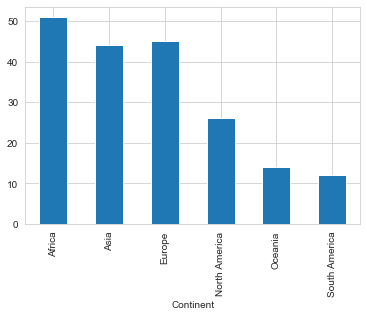

In [84]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar');

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [45]:
gdp_2014_cont = gdp_2014.merge(continents, on= 'Country', how= 'left')

In [46]:
gdp_2014_cont.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2014,1795.735834,Asia
1,Albania,2014,10700.993216,Europe


In [47]:
gdp_2014_cont.shape

(240, 4)

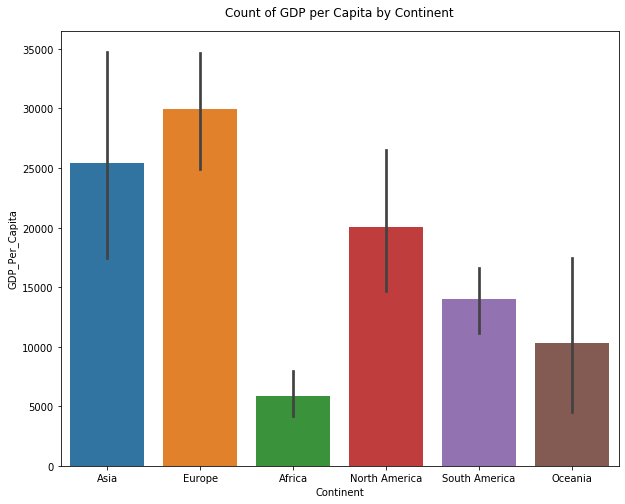

In [48]:
plt.figure(figsize = (10, 8))
sns.barplot(data = gdp_2014_cont, x = 'Continent', y = 'GDP_Per_Capita')
plt.title("Count of GDP per Capita by Continent", y=1.02);

Asia and Europe have a bigger GDP per capita than other continents. Africa is the smallest which is not surprising however I'm surprised North America is only #3...

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going
wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [49]:
list(range(4498,4688))

[4498,
 4499,
 4500,
 4501,
 4502,
 4503,
 4504,
 4505,
 4506,
 4507,
 4508,
 4509,
 4510,
 4511,
 4512,
 4513,
 4514,
 4515,
 4516,
 4517,
 4518,
 4519,
 4520,
 4521,
 4522,
 4523,
 4524,
 4525,
 4526,
 4527,
 4528,
 4529,
 4530,
 4531,
 4532,
 4533,
 4534,
 4535,
 4536,
 4537,
 4538,
 4539,
 4540,
 4541,
 4542,
 4543,
 4544,
 4545,
 4546,
 4547,
 4548,
 4549,
 4550,
 4551,
 4552,
 4553,
 4554,
 4555,
 4556,
 4557,
 4558,
 4559,
 4560,
 4561,
 4562,
 4563,
 4564,
 4565,
 4566,
 4567,
 4568,
 4569,
 4570,
 4571,
 4572,
 4573,
 4574,
 4575,
 4576,
 4577,
 4578,
 4579,
 4580,
 4581,
 4582,
 4583,
 4584,
 4585,
 4586,
 4587,
 4588,
 4589,
 4590,
 4591,
 4592,
 4593,
 4594,
 4595,
 4596,
 4597,
 4598,
 4599,
 4600,
 4601,
 4602,
 4603,
 4604,
 4605,
 4606,
 4607,
 4608,
 4609,
 4610,
 4611,
 4612,
 4613,
 4614,
 4615,
 4616,
 4617,
 4618,
 4619,
 4620,
 4621,
 4622,
 4623,
 4624,
 4625,
 4626,
 4627,
 4628,
 4629,
 4630,
 4631,
 4632,
 4633,
 4634,
 4635,
 4636,
 4637,
 4638,
 4639,
 4640,

In [50]:
internet_df = pd.read_csv('../data/internet_use.csv', skiprows=list(range(4497,4688)))
internet_df.head()
#pd.read_csv('../data/internet_use.csv', usecols=['Country or Area', 'Year', 'Value'])[:-181]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [51]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [52]:
internet_df =internet_df.drop(['Value Footnotes'], axis=1)

In [53]:
#and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’
internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'}, inplace = True)
internet_df.head(5)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [54]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country               4495 non-null object
Year                  4495 non-null int64
Internet_Users_Pct    4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.4+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick
a visualization that you think illustrates this trend well.

In [55]:
internet_df[internet_df['Internet_Users_Pct']>0].groupby('Year').min()

,Country,Internet_Users_Pct
Year,,
1990,Australia,0.001007
1991,Australia,0.000052
1992,Argentina,0.000111
1993,Argentina,0.000169
1994,Algeria,0.000138
1995,Albania,0.000018
1996,Albania,0.000108
1997,Albania,0.000211
1998,Albania,0.000413


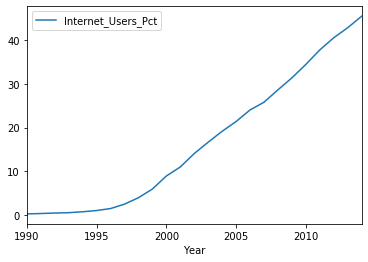

In [56]:
internet_df[internet_df['Internet_Users_Pct']>0].groupby('Year').mean().plot();

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [57]:
gdp_and_internet_use = gdp_df.merge(internet_df, on =('Country', 'Year'))

In [148]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [58]:
# Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. 
#For example, the Central African Republic is “Central African Republic” in the gdp dataframe and “Central African Rep.” in the internet use dataframe. 
#Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [154]:
list(gdp_df['Country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "CÃ´te d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'CuraÃ§ao',
 'Cyprus',
 'Czech Republic',
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 

In [ ]:
list(internet_df['Country'].unique())

In [152]:
gdp_df['Country'].unique() =! 

213

27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [59]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [60]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [89]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [62]:
# What is the mean internet users percentage in 2014
gdp_and_internet_use_2014.Internet_Users_Pct.mean()

44.673536463414635

In [63]:
# How many countries have at least 90% internet users in 2014
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [64]:
gdp_and_internet_use_2014.nlargest(3, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [79]:
gdp_and_internet_use_FG = gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(['Qatar', 'Luxembourg', 'Singapore'])]

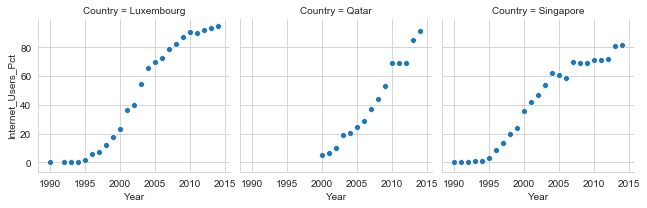

In [83]:
g = sns.FacetGrid(gdp_and_internet_use_FG, col="Country")
g.map(sns.scatterplot,"Year","Internet_Users_Pct");

They all have an exponential use in internet overtime and Qatar didn't have data before 2000.

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

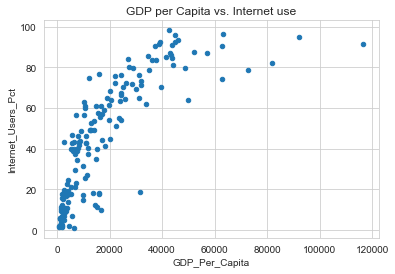

In [92]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')
plt.title('GDP per Capita vs. Internet use');

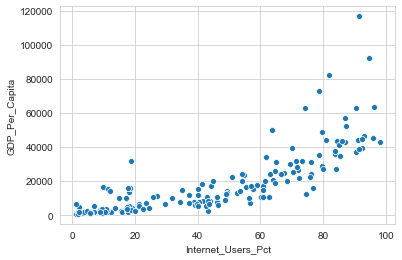

In [94]:
sns.scatterplot(data = gdp_and_internet_use_2014, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita');

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [95]:
np.corrcoef(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

I used pearson correlation coefficient and it's a moderate to strong positive correlation. 

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [98]:
gdp_and_internet_use_2014['log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

/Users/armelleleguelte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP_Per_Capita
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [100]:
gdp_and_internet_use_usa = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

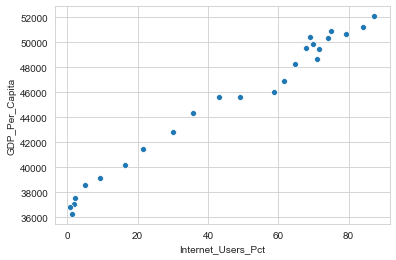

In [105]:
sns.scatterplot(data = gdp_and_internet_use_usa, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita');

In [101]:
np.corrcoef(gdp_and_internet_use_usa.Internet_Users_Pct, gdp_and_internet_use_usa.GDP_Per_Capita)

array([[1.        , 0.99161802],
       [0.99161802, 1.        ]])

Very strong correlation but I don't think it's helpful, I can't think about a link between the 2 variables.

## Solo Exploration and Presentation:

In [113]:
haz_waste_generated_df = pd.read_csv('../data/hazardous_waste_generated.csv', skiprows=list(range(755,798)))

In [114]:
haz_waste_generated_df.head(3)

,Country or Area,Year,Value,Value Footnotes,Unit
0,Algeria,2007,325100.0,NaN,tonnes
1,Algeria,2003,325000.0,NaN,tonnes
2,Algeria,1997,185000.0,NaN,tonnes


In [115]:
haz_waste_generated_df.tail()

,Country or Area,Year,Value,Value Footnotes,Unit
748,Zimbabwe,2004,21924.580078,41,tonnes
749,Zimbabwe,2003,19303.000000,42,tonnes
750,Zimbabwe,2002,20532.000000,42,tonnes
751,Zimbabwe,2001,22212.199219,42,tonnes
752,Zimbabwe,2000,21640.300781,42,tonnes


In [117]:
haz_waste_generated_df = haz_waste_generated_df.drop(['Value Footnotes'], axis=1)

In [118]:
haz_waste_generated_df.head()

,Country or Area,Year,Value,Unit
0,Algeria,2007,325100.0,tonnes
1,Algeria,2003,325000.0,tonnes
2,Algeria,1997,185000.0,tonnes
3,Algeria,1995,185000.0,tonnes
4,Andorra,2015,1788.0,tonnes


In [119]:
haz_waste_generated_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Waste_generated'}, inplace = True)
haz_waste_generated_df.head(5)

,Country,Year,Waste_generated,Unit
0,Algeria,2007,325100.0,tonnes
1,Algeria,2003,325000.0,tonnes
2,Algeria,1997,185000.0,tonnes
3,Algeria,1995,185000.0,tonnes
4,Andorra,2015,1788.0,tonnes


In [120]:
haz_waste_generated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 4 columns):
Country            753 non-null object
Year               753 non-null int64
Waste_generated    753 non-null float64
Unit               753 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 23.6+ KB


In [128]:
#merge with continent
haz_waste_generated_df = haz_waste_generated_df.merge(continents, on= 'Country', how ='left')

In [129]:
haz_waste_generated_df.head()

,Country,Year,Waste_generated,Unit,Continent
0,Algeria,2007,325100.0,tonnes,Africa
1,Algeria,2003,325000.0,tonnes,Africa
2,Algeria,1997,185000.0,tonnes,Africa
3,Algeria,1995,185000.0,tonnes,Africa
4,Andorra,2015,1788.0,tonnes,Europe


In [134]:
haz_waste_generated_df.count()

Country            753
Year               753
Waste_generated    753
Unit               753
Continent          586
dtype: int64

In [138]:
tot_waste_collect_df = pd.read_csv('../data/tot_amount_waste_collect.csv', skiprows=list(range(629,655)))

In [139]:
tot_waste_collect_df.head()

,Country or Area,Year,Value,Value Footnotes,Unit
0,Andorra,2015,0.0,NaN,tonnes
1,Andorra,2014,0.0,NaN,tonnes
2,Andorra,2013,0.0,NaN,tonnes
3,Andorra,2012,0.0,NaN,tonnes
4,Andorra,2011,0.0,NaN,tonnes


In [140]:
tot_waste_collect_df.tail()

,Country or Area,Year,Value,Value Footnotes,Unit
622,Zimbabwe,2004,21924.580078,24,tonnes
623,Zimbabwe,2003,19303.000000,25,tonnes
624,Zimbabwe,2002,20532.000000,25,tonnes
625,Zimbabwe,2001,22212.199219,25,tonnes
626,Zimbabwe,2000,21640.300781,25,tonnes


In [142]:
tot_waste_collect_df = tot_waste_collect_df.drop(['Value Footnotes'], axis=1)

In [147]:
tot_waste_collect_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Waste_collect'}, inplace = True)
tot_waste_collect_df.head(5)

SyntaxError: invalid syntax (<ipython-input-147-0cd4c445d30a>, line 1)

In [ ]:
#merge with haz_waste_generated_df
waste_generated_collect = haz_waste_generated_df.merge(tot_waste_collect_df, on= 'Country', how ='left')

In [126]:
gdp_internet_waste_pivoted = gdp_internet_waste[(gdp_internet_waste['Year'] == 1990) |
                    (gdp_internet_waste['Year'] == 2017)].pivot_table(values = 'Waste_generated', index = 'Country', columns= 'Year').dropna()


In [127]:
gdp_internet_waste_pivoted.head()

Year,1990
Country,
Panama,173.172699
